In [1]:
 #importing packages
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#data reading
df = pd.read_excel("C:\\Users\\BHANARAM\\Documents\\project\\Win Prediction\\Win_Prediction_Data.xlsx")

In [3]:
#changing column name
df.columns = df.columns.str.replace(' ','_')

In [4]:
#checking null values
df.isnull().sum()

Client_Category     79
Solution_Type        0
Deal_Date            0
Sector               0
Location             0
VP_Name              0
Manager_Name         0
Deal_Cost            0
Deal_Status_Code     0
dtype: int64

In [5]:
df["Client_Category"] = df["Client_Category"].interpolate(method = 'pad')

In [6]:
o=[]
for index,value in df['Client_Category'].iteritems():
    if value=='Internal':
        o.append(index)

In [7]:
df_new = df.drop(index = o)

In [8]:
df1 = df_new.reset_index(drop = True)

In [9]:
df1

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Govt,Solution 7,2012-09-17,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,Lost
3,Consumer Good,Solution 42,2012-04-11,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,Won
4,International Bank,Solution 6,2012-02-11,Sector 2,L10,Long Bergstrom,Luv Malhotra,316176.47,Won
...,...,...,...,...,...,...,...,...,...
8584,Telecom,Solution 9,2019-05-23,Sector 24,L10,Gopa Trilochana,Darla Dickinson,823529.41,Lost
8585,Power ind,Solution 9,2019-03-18,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
8586,Power ind,Solution 9,2019-02-28,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
8587,Power ind,Solution 62,2019-01-27,Sector 9,L5,Man Suddeth,Cleotilde Biron,3042058.82,Won


In [10]:
df = df1

In [11]:
#replacing 0 with mean in deal cost
df['Deal_Cost']=df['Deal_Cost'].replace(0,df['Deal_Cost'].mean())

In [12]:
df['Deal_Cost'].mean()

741205.4001039402

In [13]:
# Checking duplicated values
df.duplicated().value_counts()

False    8578
True       11
dtype: int64

In [14]:
#droping duplicated values
df = df.drop_duplicates()
df

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Govt,Solution 7,2012-09-17,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,Lost
3,Consumer Good,Solution 42,2012-04-11,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,Won
4,International Bank,Solution 6,2012-02-11,Sector 2,L10,Long Bergstrom,Luv Malhotra,316176.47,Won
...,...,...,...,...,...,...,...,...,...
8584,Telecom,Solution 9,2019-05-23,Sector 24,L10,Gopa Trilochana,Darla Dickinson,823529.41,Lost
8585,Power ind,Solution 9,2019-03-18,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
8586,Power ind,Solution 9,2019-02-28,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
8587,Power ind,Solution 62,2019-01-27,Sector 9,L5,Man Suddeth,Cleotilde Biron,3042058.82,Won


# Changing data from categorical values into numeric values

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
lable = le.fit_transform(df['Deal_Status_Code'])
lable

array([1, 1, 0, ..., 0, 1, 0])

In [16]:
df.drop('Deal_Status_Code',axis=1,inplace= True)
df["Deal_Status_Code"] = lable
df

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,1
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,1
2,Govt,Solution 7,2012-09-17,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,0
3,Consumer Good,Solution 42,2012-04-11,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,1
4,International Bank,Solution 6,2012-02-11,Sector 2,L10,Long Bergstrom,Luv Malhotra,316176.47,1
...,...,...,...,...,...,...,...,...,...
8584,Telecom,Solution 9,2019-05-23,Sector 24,L10,Gopa Trilochana,Darla Dickinson,823529.41,0
8585,Power ind,Solution 9,2019-03-18,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,0
8586,Power ind,Solution 9,2019-02-28,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,0
8587,Power ind,Solution 62,2019-01-27,Sector 9,L5,Man Suddeth,Cleotilde Biron,3042058.82,1


In [17]:
df.to_excel('win5.xlsx')

In [18]:
df["Deal_Status_Code"].value_counts()

0    5587
1    2991
Name: Deal_Status_Code, dtype: int64

In [19]:
lable = le.fit_transform(df['Client_Category'])
lable

array([38, 38, 11, ..., 30, 30, 27])

In [20]:
df.drop('Client_Category',axis=1,inplace= True)
df["Client_Category"] = lable
df

,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code,Client_Category
0,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,1,38
1,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,1,38
2,Solution 7,2012-09-17,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,0,11
3,Solution 42,2012-04-11,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,1,3
4,Solution 6,2012-02-11,Sector 2,L10,Long Bergstrom,Luv Malhotra,316176.47,1,19
...,...,...,...,...,...,...,...,...,...
8584,Solution 9,2019-05-23,Sector 24,L10,Gopa Trilochana,Darla Dickinson,823529.41,0,38
8585,Solution 9,2019-03-18,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,0,30
8586,Solution 9,2019-02-28,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,0,30
8587,Solution 62,2019-01-27,Sector 9,L5,Man Suddeth,Cleotilde Biron,3042058.82,1,30


In [21]:
l = le.fit_transform(df['Solution_Type'])
l

array([62, 62, 62, ..., 64, 56, 64])

In [22]:
df.drop('Solution_Type',axis=1,inplace= True)
df["Solution_Type"] = l
df

,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code,Client_Category,Solution_Type
0,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,1,38,62
1,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,1,38,62
2,2012-09-17,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,0,11,62
3,2012-04-11,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,1,3,34
4,2012-02-11,Sector 2,L10,Long Bergstrom,Luv Malhotra,316176.47,1,19,53
...,...,...,...,...,...,...,...,...,...
8584,2019-05-23,Sector 24,L10,Gopa Trilochana,Darla Dickinson,823529.41,0,38,64
8585,2019-03-18,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,0,30,64
8586,2019-02-28,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,0,30,64
8587,2019-01-27,Sector 9,L5,Man Suddeth,Cleotilde Biron,3042058.82,1,30,56


In [23]:
la = le.fit_transform(df['Sector'])
la

array([16, 16,  4, ..., 24, 24,  3])

In [24]:
df.drop('Sector',axis=1,inplace= True)
df["Sector"] = la
df

,Deal_Date,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code,Client_Category,Solution_Type,Sector
0,2012-03-27,L5,Ekta Zutshi,Gopa Trilochana,150000.00,1,38,62,16
1,2012-09-25,L5,Ekta Zutshi,Gopa Trilochana,744705.88,1,38,62,16
2,2012-09-17,L5,Sargar Deep Rao,Vidur Hukle,409705.88,0,11,62,4
3,2012-04-11,L10,Lilli Storrs,Md. Daud,1032352.94,1,3,34,3
4,2012-02-11,L10,Long Bergstrom,Luv Malhotra,316176.47,1,19,53,11
...,...,...,...,...,...,...,...,...,...
8584,2019-05-23,L10,Gopa Trilochana,Darla Dickinson,823529.41,0,38,64,16
8585,2019-03-18,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,0,30,64,24
8586,2019-02-28,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,0,30,64,24
8587,2019-01-27,L5,Man Suddeth,Cleotilde Biron,3042058.82,1,30,56,24


In [25]:
lab = le.fit_transform(df['Location'])
lab

array([7, 7, 7, ..., 7, 7, 1])

In [26]:
df.drop('Location',axis=1,inplace= True)
df["Location"] = lab
df

,Deal_Date,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code,Client_Category,Solution_Type,Sector,Location
0,2012-03-27,Ekta Zutshi,Gopa Trilochana,150000.00,1,38,62,16,7
1,2012-09-25,Ekta Zutshi,Gopa Trilochana,744705.88,1,38,62,16,7
2,2012-09-17,Sargar Deep Rao,Vidur Hukle,409705.88,0,11,62,4,7
3,2012-04-11,Lilli Storrs,Md. Daud,1032352.94,1,3,34,3,1
4,2012-02-11,Long Bergstrom,Luv Malhotra,316176.47,1,19,53,11,1
...,...,...,...,...,...,...,...,...,...
8584,2019-05-23,Gopa Trilochana,Darla Dickinson,823529.41,0,38,64,16,1
8585,2019-03-18,Rudraksh Sharma,Rudraksh Sharma,588235.29,0,30,64,24,7
8586,2019-02-28,Rudraksh Sharma,Rudraksh Sharma,588235.29,0,30,64,24,7
8587,2019-01-27,Man Suddeth,Cleotilde Biron,3042058.82,1,30,56,24,7


In [27]:
labl = le.fit_transform(df['VP_Name'])
labl

array([ 6,  6, 31, ..., 29, 19, 34])

In [28]:
df.drop('VP_Name',axis=1,inplace= True)
df["VP_Name"] = labl
df

,Deal_Date,Manager_Name,Deal_Cost,Deal_Status_Code,Client_Category,Solution_Type,Sector,Location,VP_Name
0,2012-03-27,Gopa Trilochana,150000.00,1,38,62,16,7,6
1,2012-09-25,Gopa Trilochana,744705.88,1,38,62,16,7,6
2,2012-09-17,Vidur Hukle,409705.88,0,11,62,4,7,31
3,2012-04-11,Md. Daud,1032352.94,1,3,34,3,1,15
4,2012-02-11,Luv Malhotra,316176.47,1,19,53,11,1,16
...,...,...,...,...,...,...,...,...,...
8584,2019-05-23,Darla Dickinson,823529.41,0,38,64,16,1,9
8585,2019-03-18,Rudraksh Sharma,588235.29,0,30,64,24,7,29
8586,2019-02-28,Rudraksh Sharma,588235.29,0,30,64,24,7,29
8587,2019-01-27,Cleotilde Biron,3042058.82,1,30,56,24,7,19


In [29]:
lable_1 = le.fit_transform(df['Manager_Name'])
lable_1

array([ 80,  80, 223, ..., 179,  48, 212])

In [30]:
df.drop('Manager_Name',axis=1,inplace= True)
df["Manager_Name"] = lable_1
df

,Deal_Date,Deal_Cost,Deal_Status_Code,Client_Category,Solution_Type,Sector,Location,VP_Name,Manager_Name
0,2012-03-27,150000.00,1,38,62,16,7,6,80
1,2012-09-25,744705.88,1,38,62,16,7,6,80
2,2012-09-17,409705.88,0,11,62,4,7,31,223
3,2012-04-11,1032352.94,1,3,34,3,1,15,136
4,2012-02-11,316176.47,1,19,53,11,1,16,121
...,...,...,...,...,...,...,...,...,...
8584,2019-05-23,823529.41,0,38,64,16,1,9,54
8585,2019-03-18,588235.29,0,30,64,24,7,29,179
8586,2019-02-28,588235.29,0,30,64,24,7,29,179
8587,2019-01-27,3042058.82,1,30,56,24,7,19,48


In [31]:
# droping unwanted columns
df =df.drop(['Deal_Date'], axis = 1)

In [32]:
#importing packages for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [33]:
#separating data into X,y
X = df.drop("Deal_Status_Code",axis=1)
y = df["Deal_Status_Code"]

In [34]:
#apply SelectKBest class to extract top 7 best features
bestfeatures = SelectKBest(score_func = chi2, k=7)
fit = bestfeatures.fit(X,y)

In [36]:
dfscores=pd.DataFrame(fit.scores_,columns=['scores'])
dfcolumns = pd.DataFrame(X.columns)

In [37]:
df_rank =pd.concat([dfcolumns,dfscores],axis=1)

In [38]:
#score of features
df_rank

,0,scores
0,Deal_Cost,738906.149583
1,Client_Category,1.524229
2,Solution_Type,200.016849
3,Sector,45.308523
4,Location,8.447771
5,VP_Name,0.774037
6,Manager_Name,8.277755


In [39]:
#importing packages for feature selection
from sklearn.ensemble import ExtraTreesClassifier
modle = ExtraTreesClassifier()
modle.fit(X,y)

ExtraTreesClassifier()

In [40]:
# score
print(modle.feature_importances_)

[0.28332122 0.12507784 0.13160027 0.10485986 0.07394907 0.11931168
 0.16188006]


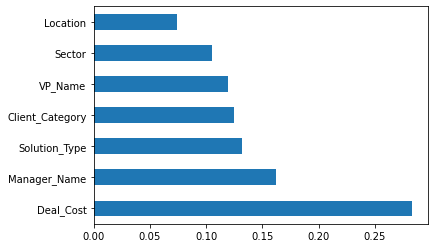

In [41]:
# ploting bargraph for checking best feature
df_feat = pd.Series(modle.feature_importances_,index = X.columns)
df_feat.nlargest(7).plot(kind = 'barh')
plt.show()

<AxesSubplot:>

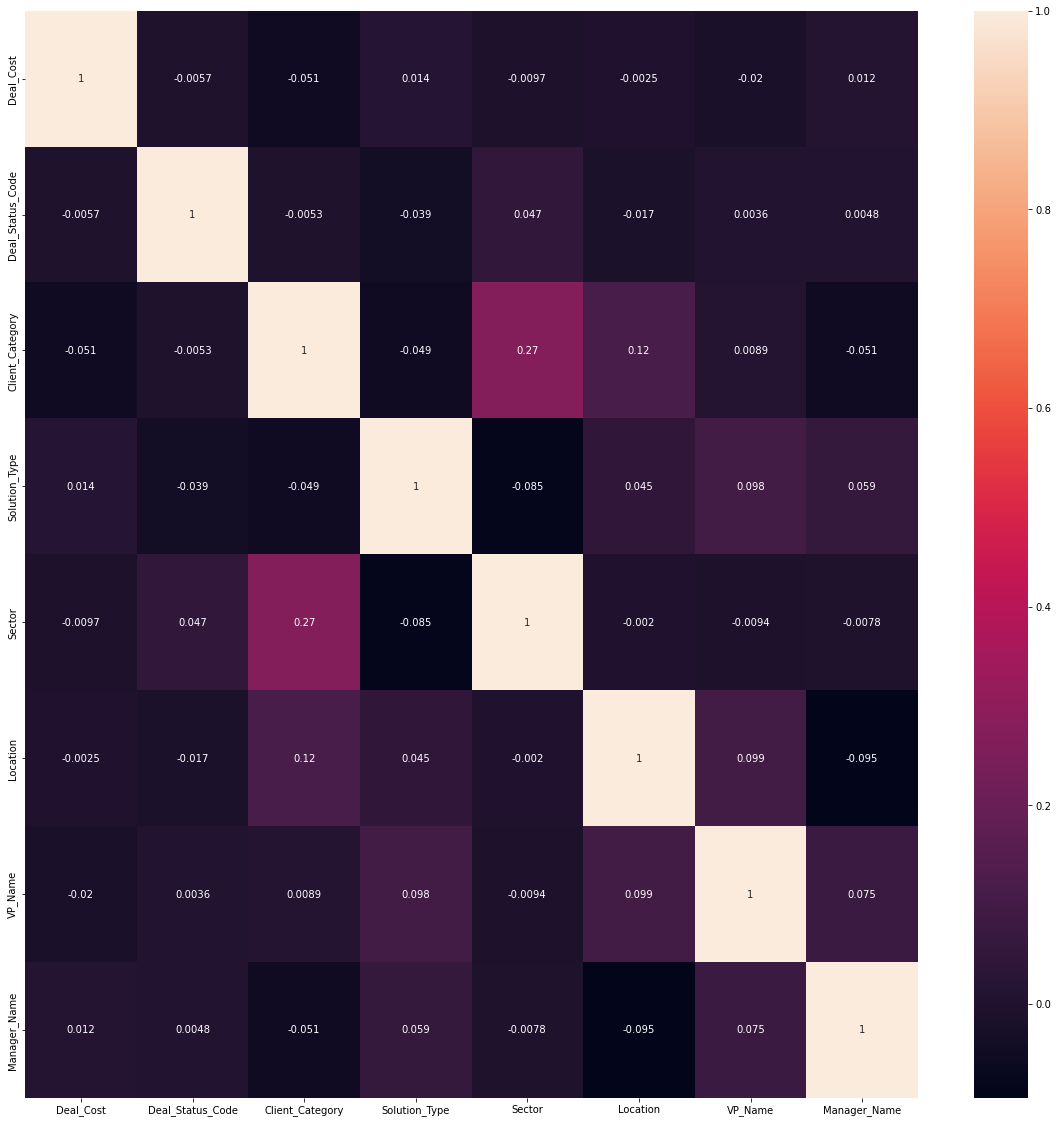

In [42]:
# heatmap for checking key points in the dataframe
corr = df.corr()
top_feat = corr.index
plt.figure(figsize=(20,20))
sn.heatmap(df[top_feat].corr(),annot= True)

In [43]:
#dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=20)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6004, 7), (2574, 7), (6004,), (2574,))

## Cross validation

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
knnclassifier = KNeighborsClassifier(n_neighbors=4)
print(cross_val_score(knnclassifier,X,y,cv=10,scoring='accuracy').mean())

0.6290517145242932


In [45]:
tree = tree.DecisionTreeClassifier()
print(cross_val_score(tree,X,y,cv=10,scoring='accuracy').mean())

0.5897629014315129


In [46]:
rdf = RandomForestClassifier()
print(cross_val_score(rdf,X,y,cv=10,scoring='accuracy').mean())

0.6823293975569353


In [47]:
#import random forest
from sklearn.ensemble import RandomForestClassifier

#build a classifier 
rf = RandomForestClassifier(n_estimators=100)

#Train the model using the trainig sets
rf.fit(X_train, y_train)

#predict the response for test dataset
y_pred = rf.predict(X_test)

In [48]:
#import scikit-learn metrics module for accuracy calculation 
from sklearn import metrics

#model accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
#model precision
print("Precision:", metrics.precision_score(y_test, y_pred))
#model recall
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.7855477855477856
Precision: 0.7996545768566494
Recall: 0.5150166852057843


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1559,  116],
       [ 436,  463]], dtype=int64)

In [50]:
#use model to predict probability that given y value is 1
y_pred_proba = rf.predict_proba(X_test)[::,1]

#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#print AUC score
print(auc)

0.8728524230903325
